### Introduction

### Loading data

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

In [2]:
train=pd.read_csv('cell2celltrain.csv')
test=pd.read_csv('cell2cellholdout.csv')

In [3]:
train.head()

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,...,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,...,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,...,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,...,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,...,0,9,No,1,10,No,1-Highest,Other,Professional,Yes


In [4]:
test.head()

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000006,NaN,57.49,483.0,37.0,0.25,23.0,0.0,532.0,51.0,...,0,5,No,1,150,No,5-Low,Other,Other,No
1,3000018,NaN,55.23,570.0,72.0,0.00,0.0,0.0,38.0,0.0,...,0,6,No,2,80,No,1-Highest,Other,Professional,No
2,3000034,NaN,97.34,1039.0,50.0,4.95,420.0,0.0,198.0,23.3,...,0,4,No,3,10,No,3-Good,Suburban,Crafts,Yes
3,3000070,NaN,35.59,153.0,30.0,0.00,16.0,0.0,30.0,7.3,...,0,4,No,1,200,No,1-Highest,Other,Other,No
4,3000074,NaN,55.27,1213.0,50.0,0.74,0.0,1.3,169.0,1.0,...,0,3,No,0,10,No,1-Highest,Suburban,Other,No


In [5]:
train.shape

(51047, 58)

### Data Analysis and Preprocessing
Since 'CustomerID', 'ServiceArea' don't really affect the churn result, we can remove these columns from the dataset.

In [6]:
train.drop(['CustomerID', 'ServiceArea'], axis=1, inplace=True)
test.drop(['CustomerID', 'ServiceArea'], axis=1, inplace=True)

In [7]:
for i in train.columns:
      if train[i].dtype=='object':
            print(pd.DataFrame(train[i].value_counts()))

     Churn
No   36336
Yes  14711
     ChildrenInHH
No          38679
Yes         12368
     HandsetRefurbished
No                43956
Yes                7091
     HandsetWebCapable
Yes              46046
No                5001
     TruckOwner
No        41524
Yes        9523
     RVOwner
No     46894
Yes     4153
         Homeownership
Known            33987
Unknown          17060
     BuysViaMailOrder
No              32596
Yes             18451
     RespondsToMailOffers
No                  31821
Yes                 19226
     OptOutMailings
No            50295
Yes             752
     NonUSTravel
No         48168
Yes         2879
     OwnsComputer
No          41583
Yes          9464
     HasCreditCard
Yes          34503
No           16544
     NewCellphoneUser
No              41223
Yes              9824
     NotNewCellphoneUser
No                 44012
Yes                 7035
     OwnsMotorcycle
No            50368
Yes             679
         HandsetPrice
Unknown         28982
30   

In [8]:
null_count = train.isnull().sum()
null_rate = null_count/train.count() *100
print(null_rate)

Churn                        0.000000
MonthlyRevenue               0.306538
MonthlyMinutes               0.306538
TotalRecurringCharge         0.306538
DirectorAssistedCalls        0.306538
OverageMinutes               0.306538
RoamingCalls                 0.306538
PercChangeMinutes            0.724152
PercChangeRevenues           0.724152
DroppedCalls                 0.000000
BlockedCalls                 0.000000
UnansweredCalls              0.000000
CustomerCareCalls            0.000000
ThreewayCalls                0.000000
ReceivedCalls                0.000000
OutboundCalls                0.000000
InboundCalls                 0.000000
PeakCallsInOut               0.000000
OffPeakCallsInOut            0.000000
DroppedBlockedCalls          0.000000
CallForwardingCalls          0.000000
CallWaitingCalls             0.000000
MonthsInService              0.000000
UniqueSubs                   0.000000
ActiveSubs                   0.000000
Handsets                     0.001959
HandsetModel

In [9]:
change_unknown2null = ["HandsetPrice", "MaritalStatus"]

train[change_unknown2null] = train[change_unknown2null].replace("Unknown", np.nan)
test[change_unknown2null] = test[change_unknown2null].replace("Unknown", np.nan)


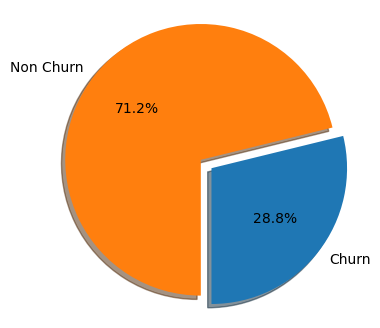

In [10]:
churn=train[train['Churn']== 'Yes'].shape[0]
non_churn = train[train['Churn'] == "No"].shape[0]

fig1, ax1 = plt.subplots(figsize = (4,4))
labels = ["Churn", "Non Churn"]

# explode create distance between 2 part of pie
ax1.pie([churn,non_churn], explode=[0.1, 0], labels=labels,autopct='%1.1f%%',shadow=True, startangle=270)
ax1.axis('equal')  
plt.show()

#### Customer churn is 28.8%. The data is unbalanced.

So when splitting data, we need to balance data


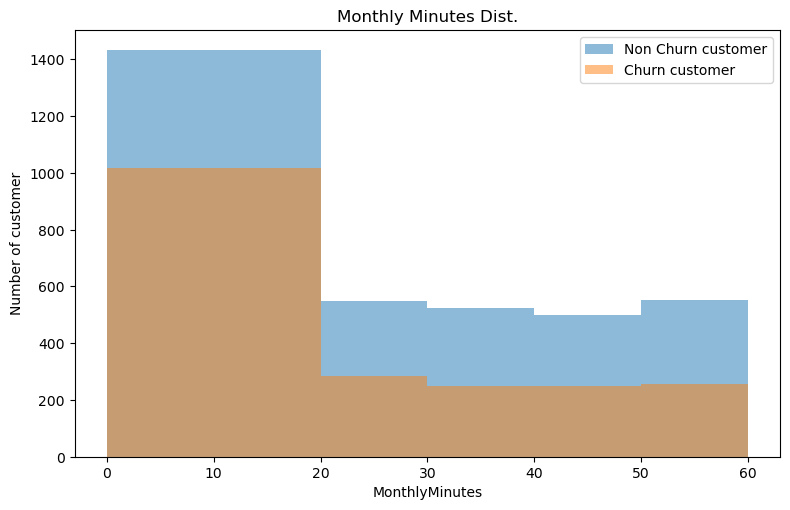

In [11]:
fig = plt.subplots(figsize=(8, 5))
plt.hist(train[train['Churn']=='No']['MonthlyMinutes'],bins=[0,20,30,40,50,60],alpha=0.5, label='Non Churn customer')
plt.hist(train[train['Churn']=='Yes']['MonthlyMinutes'],bins=[0,20,30,40,50,60],alpha=0.5,label='Churn customer')
plt.ylabel("Number of customer")
plt.xlabel("MonthlyMinutes")
plt.legend()
plt.tight_layout()
plt.title('Monthly Minutes Dist.')
plt.show()

<Axes: xlabel='CreditRating', ylabel='count'>

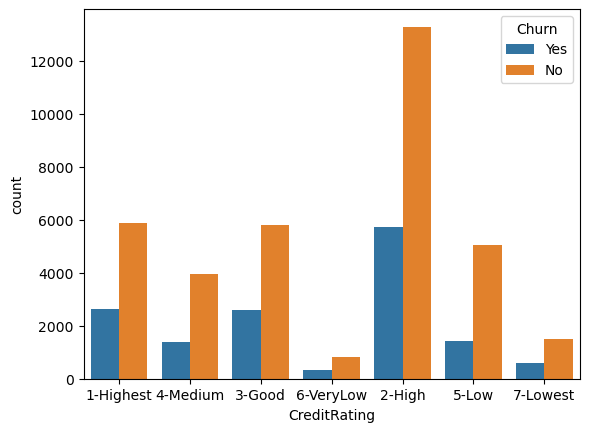

In [12]:
sns.countplot(data = train, x = "CreditRating", hue = "Churn")

### Categories of dataset

In [13]:
pd.DataFrame(train.value_counts())

0
Churn MonthlyRevenue MonthlyMinutes TotalRecurringCharge DirectorAssistedCalls OverageMinutes RoamingCalls PercChangeMinutes PercChangeRevenues DroppedCalls BlockedCalls UnansweredCalls CustomerCareCalls ThreewayCalls ReceivedCalls OutboundCalls InboundCalls PeakCallsInOut OffPeakCallsInOut DroppedBlockedCalls CallForwardingCalls CallWaitingCalls MonthsInService UniqueSubs ActiveSubs Handsets HandsetModels CurrentEquipmentDays AgeHH1 AgeHH2 ChildrenInHH HandsetRefurbished HandsetWebCapable TruckOwner RVOwner Homeownership BuysViaMailOrder RespondsToMailOffers OptOutMailings NonUSTravel OwnsComputer HasCreditCard RetentionCalls RetentionOffersAccepted NewCellphoneUser NotNewCellphoneUser ReferralsMadeBySubscriber IncomeGroup OwnsMotorcycle AdjustmentsToCreditRating HandsetPrice MadeCallToRetentionTeam CreditRating PrizmCode Occupation   MaritalStatus   
No    0.00           1.0            0.0                  0.00                  0.0            0.0           0.0               0.0               0.0          0.0          0.0             0.0               0.0           0.0           0.0           0.0          0.0            0.0               0.0                 0.0                 0.0              59              2          2          2.0      2.0           866.0                26.0   0.0    No           No                 No                No         No      Known         No               No                   No             No          No           Yes           0              0                       No               No                  0                         4           No             1                         30           No                      1-Highest    Suburban  Other        Yes            1
      120.68         2731.0         110.0                0.00                  36.0           0.0           438.0             38.1              27.3         10.0         194.0           6.0               5.3           753.1         201.7         116.7        402.7          402.3             38.0                0.0                 21.7             9               3          1          2.0      1.0           127.0                28.0   58.0   No           No                 Yes               No         No      Known         No               No                   No             No          No           Yes           0              0                       No               No                  0                         6           No             0                         200          No                      5-Low        Suburban  Other        Yes            1
      120.11         658.0          30.0                 0.00                  258.0          0.0           214.0             74.7              1.0          3.3          42.3            0.3               0.0           325.0         24.3          24.3         156.0          229.3             4.3                 0.0                 7.7              12              1          1          2.0      2.0           209.0                44.0   46.0   Yes          No                 Yes               Yes        Yes     Known         Yes              Yes                  No             No          No           Yes           0              0                       Yes              No                  0                         5           No             0                         10           No                      7-Lowest     Other     Clerical     Yes            1
      120.19         924.0          75.0                 11.63                 136.0          0.0          -910.0            -45.2              7.7          47.3         20.0            7.0               0.7           219.8         34.0          15.3         258.7          222.0             55.0                0.0                 10.0             14              1          1          3.0      3.0           229.0                50.0   0.0    Yes          No                 Yes               No         No      Known         No        

In [14]:
for i in train.columns:
      if train[i].dtype=='int64':
            print(pd.DataFrame(train[i].value_counts()))

    MonthsInService
11             3599
7              2821
12             2737
13             2719
9              2477
10             2381
14             2291
8              2214
19             2004
15             1871
23             1836
21             1809
16             1778
17             1749
25             1611
18             1509
20             1413
22             1269
24             1174
26             1022
27              935
29              899
31              863
6               746
28              741
33              717
30              700
35              685
32              589
34              543
37              466
36              425
38              286
39              240
41              210
40              175
43              174
42              151
45              144
44              140
47              124
48              117
49              111
46              110
53               90
50               84
51               64
52               57
54               50


### Changing type of columns

In [15]:
features = ['IncomeGroup', 'RetentionCalls']
def convert_cat(df, features):
    for feature in features:
        df[feature] = df[feature].astype('category')

    for i in df.columns:
      if train[i].dtype=='object':
            df[i] = df[i].astype('category')
    
convert_cat(train, features)
convert_cat(test, features)

In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51047 entries, 0 to 51046
Data columns (total 56 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Churn                      51047 non-null  category
 1   MonthlyRevenue             50891 non-null  float64 
 2   MonthlyMinutes             50891 non-null  float64 
 3   TotalRecurringCharge       50891 non-null  float64 
 4   DirectorAssistedCalls      50891 non-null  float64 
 5   OverageMinutes             50891 non-null  float64 
 6   RoamingCalls               50891 non-null  float64 
 7   PercChangeMinutes          50680 non-null  float64 
 8   PercChangeRevenues         50680 non-null  float64 
 9   DroppedCalls               51047 non-null  float64 
 10  BlockedCalls               51047 non-null  float64 
 11  UnansweredCalls            51047 non-null  float64 
 12  CustomerCareCalls          51047 non-null  float64 
 13  ThreewayCalls              5104

In [17]:
print("Categorical Var. : {}".format(train.select_dtypes(exclude=['int', 'float']).columns))

print("Numeric Var. : {}".format(train.select_dtypes(include=['int', 'float']).columns))

Categorical Var. : Index(['Churn', 'ChildrenInHH', 'HandsetRefurbished', 'HandsetWebCapable',
       'TruckOwner', 'RVOwner', 'Homeownership', 'BuysViaMailOrder',
       'RespondsToMailOffers', 'OptOutMailings', 'NonUSTravel', 'OwnsComputer',
       'HasCreditCard', 'RetentionCalls', 'NewCellphoneUser',
       'NotNewCellphoneUser', 'IncomeGroup', 'OwnsMotorcycle', 'HandsetPrice',
       'MadeCallToRetentionTeam', 'CreditRating', 'PrizmCode', 'Occupation',
       'MaritalStatus'],
      dtype='object')
Numeric Var. : Index(['MonthlyRevenue', 'MonthlyMinutes', 'TotalRecurringCharge',
       'DirectorAssistedCalls', 'OverageMinutes', 'RoamingCalls',
       'PercChangeMinutes', 'PercChangeRevenues', 'DroppedCalls',
       'BlockedCalls', 'UnansweredCalls', 'CustomerCareCalls', 'ThreewayCalls',
       'ReceivedCalls', 'OutboundCalls', 'InboundCalls', 'PeakCallsInOut',
       'OffPeakCallsInOut', 'DroppedBlockedCalls', 'CallForwardingCalls',
       'CallWaitingCalls', 'MonthsInService', 'Un

### Missing Values


In [18]:
train.columns[train.isnull().any()]

Index(['MonthlyRevenue', 'MonthlyMinutes', 'TotalRecurringCharge',
       'DirectorAssistedCalls', 'OverageMinutes', 'RoamingCalls',
       'PercChangeMinutes', 'PercChangeRevenues', 'Handsets', 'HandsetModels',
       'CurrentEquipmentDays', 'AgeHH1', 'AgeHH2', 'HandsetPrice',
       'MaritalStatus'],
      dtype='object')

In [19]:
test.columns[test.isnull().any()]

Index(['Churn', 'MonthlyRevenue', 'MonthlyMinutes', 'TotalRecurringCharge',
       'DirectorAssistedCalls', 'OverageMinutes', 'RoamingCalls',
       'PercChangeMinutes', 'PercChangeRevenues', 'AgeHH1', 'AgeHH2',
       'HandsetPrice', 'MaritalStatus'],
      dtype='object')

In [20]:
train_missings=train.filter(['MonthlyRevenue', 
                             'MonthlyMinutes', 
                             'TotalRecurringCharge',
                             'DirectorAssistedCalls', 
                             'OverageMinutes', 
                             'RoamingCalls',
                             'PercChangeMinutes', 
                             'PercChangeRevenues', 
                             'ServiceArea', 
                             'Handsets',
                             'HandsetModels', 
                             'CurrentEquipmentDays', 
                             'AgeHH1', 
                             'AgeHH2',  
                             'Homeownership',
                             'HandsetPrice', 
                             'MaritalStatus'], axis=1)

In [21]:
test_missings=test.filter(['MonthlyRevenue', 
                             'MonthlyMinutes', 
                             'TotalRecurringCharge',
                             'DirectorAssistedCalls', 
                             'OverageMinutes', 
                             'RoamingCalls',
                             'PercChangeMinutes', 
                             'PercChangeRevenues', 
                             'ServiceArea', 
                             'Handsets',
                             'HandsetModels', 
                             'CurrentEquipmentDays', 
                             'AgeHH1', 
                             'AgeHH2',   
                             'Homeownership',
                             'HandsetPrice', 
                             'MaritalStatus'], axis=1)

In [22]:
mis_val_train = train_missings.isnull().sum()/len(train_missings) *100
mis_val_test = test_missings.isnull().sum()/len(test_missings) * 100

print("Missing-value rate of train data:")
print(mis_val_train)

print("\nMissing-value rate of train data:")
print(mis_val_test)

Missing-value rate of train data:
MonthlyRevenue            0.305601
MonthlyMinutes            0.305601
TotalRecurringCharge      0.305601
DirectorAssistedCalls     0.305601
OverageMinutes            0.305601
RoamingCalls              0.305601
PercChangeMinutes         0.718945
PercChangeRevenues        0.718945
Handsets                  0.001959
HandsetModels             0.001959
CurrentEquipmentDays      0.001959
AgeHH1                    1.780712
AgeHH2                    1.780712
Homeownership             0.000000
HandsetPrice             56.775129
MaritalStatus            38.591886
dtype: float64

Missing-value rate of train data:
MonthlyRevenue            0.300
MonthlyMinutes            0.300
TotalRecurringCharge      0.300
DirectorAssistedCalls     0.300
OverageMinutes            0.300
RoamingCalls              0.300
PercChangeMinutes         0.675
PercChangeRevenues        0.675
Handsets                  0.000
HandsetModels             0.000
CurrentEquipmentDays      0.000
AgeH

* <i>"HandsetPrice", "MaritalStatus" have high rate of missing value</i>

In [23]:
train.drop(["HandsetPrice", "MaritalStatus"], axis=1, inplace=True)
test.drop(["HandsetPrice", "MaritalStatus"], axis=1, inplace=True)

In [24]:
churn = train[train["Churn"] == "Yes"]
non_churn = train[train["Churn"] == "No"]

In [25]:
churn.describe()

,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,...,UniqueSubs,ActiveSubs,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,RetentionOffersAccepted,ReferralsMadeBySubscriber,AdjustmentsToCreditRating
count,14641.000000,14641.000000,14641.000000,14641.000000,14641.000000,14641.000000,14503.000000,14503.000000,14711.000000,14711.000000,...,14711.000000,14711.000000,14711.000000,14711.000000,14711.000000,14462.000000,14462.000000,14711.000000,14711.000000,14711.000000
mean,57.995041,483.827471,44.529882,0.826793,42.529472,1.404358,-25.458388,-0.497111,5.792638,3.990538,...,1.598532,1.370811,1.736932,1.501733,421.903881,30.306043,20.445927,0.026103,0.046904,0.043641
std,44.505934,504.634392,22.990134,1.954381,93.172832,11.106095,269.493300,46.652335,8.834394,10.691814,...,1.852533,0.761329,1.262219,0.863085,259.940076,22.013043,23.536945,0.169771,0.240896,0.297278
min,0.000000,0.000000,-11.000000,0.000000,0.000000,0.000000,-2868.000000,-851.100000,0.000000,0.000000,...,1.000000,0.000000,1.000000,1.000000,-4.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.520000,132.000000,30.000000,0.000000,0.000000,0.000000,-101.000000,-7.750000,0.700000,0.000000,...,1.000000,1.000000,1.000000,1.000000,249.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,47.520000,330.000000,44.000000,0.250000,4.000000,0.000000,-11.000000,-0.300000,3.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,366.000000,34.000000,0.000000,0.000000,0.000000,0.000000
75%,69.950000,667.000000,55.000000,0.740000,46.000000,0.300000,54.000000,1.700000,7.300000,3.300000,...,2.000000,2.000000,2.000000,2.000000,564.000000,48.000000,42.000000,0.000000,0.000000,0.000000
max,861.110000,5410.000000,338.000000,45.790000,2018.000000,850.900000,5192.000000,2483.500000,208.700000,314.700000,...,196.000000,53.000000,22.000000,14.000000,1779.000000,98.000000,99.000000,3.000000,9.000000,9.000000


In [26]:
non_churn.describe()

,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,...,UniqueSubs,ActiveSubs,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,RetentionOffersAccepted,ReferralsMadeBySubscriber,AdjustmentsToCreditRating
count,36250.000000,36250.000000,36250.000000,36250.000000,36250.000000,36250.000000,36177.000000,36177.000000,36336.000000,36336.000000,...,36336.000000,36336.000000,36335.000000,36335.000000,36335.000000,35676.000000,35676.000000,36336.000000,36336.000000,36336.000000
mean,59.173538,542.546483,47.759117,0.922870,39.017379,1.168345,-5.971335,-1.470553,6.100094,4.124188,...,1.505284,1.347672,1.833466,1.581836,363.801156,31.756503,21.427178,0.015109,0.054161,0.058069
std,44.504027,538.816505,24.125276,2.329606,97.916838,9.246760,252.341813,36.349778,9.126058,11.048418,...,0.843058,0.637329,1.357123,0.921723,249.334338,22.114216,24.083977,0.129644,0.330772,0.412795
min,-6.170000,0.000000,-9.000000,0.000000,0.000000,0.000000,-3875.000000,-1107.700000,0.000000,0.000000,...,1.000000,0.000000,1.000000,1.000000,-5.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,34.100000,170.000000,30.000000,0.000000,0.000000,0.000000,-78.000000,-6.800000,1.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,197.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,48.815000,381.000000,45.000000,0.250000,2.000000,0.000000,-3.000000,-0.300000,3.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,310.000000,36.000000,0.000000,0.000000,0.000000,0.000000
75%,71.617500,743.000000,60.000000,0.990000,39.000000,0.300000,70.000000,1.600000,7.700000,3.700000,...,2.000000,2.000000,2.000000,2.000000,493.000000,48.000000,44.000000,0.000000,0.000000,0.000000
max,1223.380000,7359.000000,400.000000,159.390000,4321.000000,1112.400000,4480.000000,1347.000000,221.700000,384.300000,...,12.000000,11.000000,24.000000,15.000000,1812.000000,99.000000,98.000000,3.000000,35.000000,25.000000


In [27]:
# nhóm "Churn" là "Yes" và "No", hàm này sẽ tính median của riêng từng nhóm và thay vào những ô null
train["MonthlyRevenue"].fillna(train.groupby("Churn")["MonthlyRevenue"].transform("median"), inplace = True)
test["MonthlyRevenue"].fillna(test["MonthlyRevenue"].mean(), inplace = True)


In [28]:
train["MonthlyMinutes"].fillna(train.groupby("Churn")["MonthlyMinutes"].transform("median"), inplace = True)
test["MonthlyMinutes"].fillna(test["MonthlyMinutes"].mean(), inplace = True)

In [29]:
train['TotalRecurringCharge'].fillna(train['TotalRecurringCharge'].median(),inplace=True)
test['TotalRecurringCharge'].fillna(test['TotalRecurringCharge'].median(),inplace=True)

In [30]:
train['PercChangeRevenues'].fillna(train['PercChangeRevenues'].median(),inplace=True)
test['PercChangeRevenues'].fillna(test['PercChangeRevenues'].median(),inplace=True)

In [31]:
train['PercChangeMinutes'].fillna(train['PercChangeMinutes'].median(),inplace=True)
test['PercChangeMinutes'].fillna(test['PercChangeMinutes'].median(),inplace=True)

In [32]:
train['RoamingCalls'].fillna(value=0,inplace=True)
test['RoamingCalls'].fillna(value=0,inplace=True)

In [33]:
train['OverageMinutes'].fillna(value=0,inplace=True)
test['OverageMinutes'].fillna(value=0,inplace=True)

In [34]:
train['DirectorAssistedCalls'].fillna(value=0,inplace=True)
test['DirectorAssistedCalls'].fillna(value=0,inplace=True)

In [35]:
features = ["Handsets", "HandsetModels", "CurrentEquipmentDays"]
train.dropna(subset = features, axis = 0, inplace = True)

In [36]:
train["AgeHH1"].fillna(train.groupby("Churn")["AgeHH1"].transform("median"), inplace = True)
test["AgeHH1"].fillna(test["AgeHH1"].mean(), inplace = True)

In [37]:
train["AgeHH2"].fillna(train.groupby("Churn")["AgeHH2"].transform("median"), inplace = True)
test["AgeHH2"].fillna(test["AgeHH2"].mean(), inplace = True)

In [38]:
train.isnull().sum()

Churn                        0
MonthlyRevenue               0
MonthlyMinutes               0
TotalRecurringCharge         0
DirectorAssistedCalls        0
OverageMinutes               0
RoamingCalls                 0
PercChangeMinutes            0
PercChangeRevenues           0
DroppedCalls                 0
BlockedCalls                 0
UnansweredCalls              0
CustomerCareCalls            0
ThreewayCalls                0
ReceivedCalls                0
OutboundCalls                0
InboundCalls                 0
PeakCallsInOut               0
OffPeakCallsInOut            0
DroppedBlockedCalls          0
CallForwardingCalls          0
CallWaitingCalls             0
MonthsInService              0
UniqueSubs                   0
ActiveSubs                   0
Handsets                     0
HandsetModels                0
CurrentEquipmentDays         0
AgeHH1                       0
AgeHH2                       0
ChildrenInHH                 0
HandsetRefurbished           0
HandsetW

In [39]:
test.isnull().sum()

Churn                        20000
MonthlyRevenue                   0
MonthlyMinutes                   0
TotalRecurringCharge             0
DirectorAssistedCalls            0
OverageMinutes                   0
RoamingCalls                     0
PercChangeMinutes                0
PercChangeRevenues               0
DroppedCalls                     0
BlockedCalls                     0
UnansweredCalls                  0
CustomerCareCalls                0
ThreewayCalls                    0
ReceivedCalls                    0
OutboundCalls                    0
InboundCalls                     0
PeakCallsInOut                   0
OffPeakCallsInOut                0
DroppedBlockedCalls              0
CallForwardingCalls              0
CallWaitingCalls                 0
MonthsInService                  0
UniqueSubs                       0
ActiveSubs                       0
Handsets                         0
HandsetModels                    0
CurrentEquipmentDays             0
AgeHH1              

In [40]:
train.describe()

,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,...,UniqueSubs,ActiveSubs,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,RetentionOffersAccepted,ReferralsMadeBySubscriber,AdjustmentsToCreditRating
count,51046.000000,51046.000000,51046.000000,51046.000000,51046.000000,51046.000000,51046.000000,51046.000000,51046.000000,51046.000000,...,51046.000000,51046.000000,51046.000000,51046.000000,51046.000000,51046.000000,51046.000000,51046.000000,51046.000000,51046.000000
mean,58.801741,525.151706,46.823708,0.892511,39.906241,1.232490,-11.501058,-1.185595,6.011607,4.085752,...,1.532167,1.354347,1.805646,1.558751,380.545841,31.412001,20.768033,0.018278,0.052071,0.053912
std,44.443504,529.143534,23.812184,2.225705,96.466462,9.803612,256.590494,39.432853,9.044005,10.946997,...,1.223394,0.675481,1.331173,0.905932,253.801982,21.903882,23.881668,0.142460,0.307595,0.383151
min,-6.170000,0.000000,-11.000000,0.000000,0.000000,0.000000,-3875.000000,-1107.700000,0.000000,0.000000,...,1.000000,0.000000,1.000000,1.000000,-5.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.660000,159.000000,30.000000,0.000000,0.000000,0.000000,-82.000000,-6.900000,0.700000,0.000000,...,1.000000,1.000000,1.000000,1.000000,205.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,48.480000,366.000000,45.000000,0.250000,2.500000,0.000000,-5.000000,-0.300000,3.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,329.000000,36.000000,0.000000,0.000000,0.000000,0.000000
75%,70.960000,722.000000,60.000000,0.990000,40.000000,0.200000,65.000000,1.575000,7.700000,3.700000,...,2.000000,2.000000,2.000000,2.000000,515.000000,48.000000,42.000000,0.000000,0.000000,0.000000
max,1223.380000,7359.000000,400.000000,159.390000,4321.000000,1112.400000,5192.000000,2483.500000,221.700000,384.300000,...,196.000000,53.000000,24.000000,15.000000,1812.000000,99.000000,99.000000,3.000000,35.000000,25.000000


### Oulier Detection

In [41]:
print ("There are " + str(train.shape[1]) + " columns and  " + str(train.shape[0]) + " rows in the train data.\n")
print ("There are " + str(test.shape[1]) + " columns and " + str(test.shape[0]) + " rows in the test data.\n")

There are 54 columns and  51046 rows in the train data.

There are 54 columns and 20000 rows in the test data.



In [42]:
from scipy.stats import zscore

train_outliers=train.select_dtypes(include=['int', 'float'])
train_outliers.head()

,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,...,UniqueSubs,ActiveSubs,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,RetentionOffersAccepted,ReferralsMadeBySubscriber,AdjustmentsToCreditRating
0,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,0.7,0.7,...,2,1,2.0,2.0,361.0,62.0,0.0,0,0,0
1,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,0.3,0.0,...,1,1,2.0,1.0,1504.0,40.0,42.0,0,0,0
2,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,0.0,0.0,...,1,1,1.0,1.0,1812.0,26.0,26.0,0,0,0
3,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,52.0,7.7,...,2,2,9.0,4.0,458.0,30.0,0.0,0,0,0
4,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,0.0,0.0,...,2,2,4.0,3.0,852.0,46.0,54.0,0,0,1


<i>Using Z-score method. Check number of outliers using `zscore`</i>

In [43]:
outliers1={}
for col in train_outliers:
    z_score = zscore(train_outliers[col])
    # z = (x-mean)/std
    
    upper_replace_value = train_outliers[z_score<=3][col].max()
    lower_replace_value = train_outliers[z_score>=-3][col].min()
    outliers1[col] = len(train_outliers[col][(train_outliers[col] > upper_replace_value)| (train_outliers[col] < lower_replace_value)])
outliers_zscore = pd.DataFrame(outliers1.items(),columns=['Feature','Outliers'])
print(outliers_zscore)

                      Feature  Outliers
0              MonthlyRevenue       880
1              MonthlyMinutes       914
2        TotalRecurringCharge       541
3       DirectorAssistedCalls       837
4              OverageMinutes       901
5                RoamingCalls       315
6           PercChangeMinutes      1102
7          PercChangeRevenues       841
8                DroppedCalls       987
9                BlockedCalls       819
10            UnansweredCalls       975
11          CustomerCareCalls       853
12              ThreewayCalls       567
13              ReceivedCalls      1067
14              OutboundCalls       966
15               InboundCalls       976
16             PeakCallsInOut       939
17          OffPeakCallsInOut      1034
18        DroppedBlockedCalls       883
19        CallForwardingCalls        49
20           CallWaitingCalls       765
21            MonthsInService       583
22                 UniqueSubs       234
23                 ActiveSubs       611


In [44]:
outliers2={}
for col in train_outliers:
    z_score = zscore(train_outliers[col])
    upper_replace_value = train_outliers[z_score<=3][col].max()
    lower_replace_value = train_outliers[z_score>=-3][col].min()
    train.loc[train_outliers[col] > upper_replace_value, col] = upper_replace_value
    train.loc[train_outliers[col] < lower_replace_value, col] = lower_replace_value
    outliers2[col] = len(train[col][(train[col] > upper_replace_value)| (train[col] < lower_replace_value)])
outliers_zscore = pd.DataFrame(outliers2.items(),columns=['Feature','Outliers'])
print(outliers_zscore)

                      Feature  Outliers
0              MonthlyRevenue         0
1              MonthlyMinutes         0
2        TotalRecurringCharge         0
3       DirectorAssistedCalls         0
4              OverageMinutes         0
5                RoamingCalls         0
6           PercChangeMinutes         0
7          PercChangeRevenues         0
8                DroppedCalls         0
9                BlockedCalls         0
10            UnansweredCalls         0
11          CustomerCareCalls         0
12              ThreewayCalls         0
13              ReceivedCalls         0
14              OutboundCalls         0
15               InboundCalls         0
16             PeakCallsInOut         0
17          OffPeakCallsInOut         0
18        DroppedBlockedCalls         0
19        CallForwardingCalls         0
20           CallWaitingCalls         0
21            MonthsInService         0
22                 UniqueSubs         0
23                 ActiveSubs         0


In [45]:
train.describe()

,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,...,UniqueSubs,ActiveSubs,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,RetentionOffersAccepted,ReferralsMadeBySubscriber,AdjustmentsToCreditRating
count,51046.000000,51046.000000,51046.000000,51046.000000,51046.000000,51046.000000,51046.000000,51046.000000,51046.000000,51046.000000,...,51046.000000,51046.000000,51046.000000,51046.000000,51046.000000,51046.000000,51046.000000,51046.0,51046.0,51046.000000
mean,57.460008,514.495181,46.434784,0.806111,36.025036,0.981440,-10.236257,-1.546013,5.702423,3.586295,...,1.520178,1.337343,1.749833,1.535008,378.730753,31.411864,20.765466,0.0,0.0,0.036007
std,36.531532,482.352793,21.982694,1.496766,67.828901,3.539827,219.293259,29.320194,7.226991,6.702858,...,0.820192,0.568976,1.077789,0.804105,247.102716,21.903470,23.873755,0.0,0.0,0.186309
min,-6.170000,0.000000,-11.000000,0.000000,0.000000,0.000000,-781.000000,-119.200000,0.000000,0.000000,...,1.000000,0.000000,1.000000,1.000000,-5.000000,0.000000,0.000000,0.0,0.0,0.000000
25%,33.660000,159.000000,30.000000,0.000000,0.000000,0.000000,-82.000000,-6.900000,0.700000,0.000000,...,1.000000,1.000000,1.000000,1.000000,205.000000,0.000000,0.000000,0.0,0.0,0.000000
50%,48.480000,366.000000,45.000000,0.250000,2.500000,0.000000,-5.000000,-0.300000,3.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,329.000000,36.000000,0.000000,0.0,0.0,0.000000
75%,70.960000,722.000000,60.000000,0.990000,40.000000,0.200000,65.000000,1.575000,7.700000,3.700000,...,2.000000,2.000000,2.000000,2.000000,515.000000,48.000000,42.000000,0.0,0.0,0.000000
max,192.010000,2112.000000,118.000000,7.420000,329.000000,30.600000,757.000000,116.900000,33.000000,36.700000,...,5.000000,3.000000,5.000000,4.000000,1141.000000,96.000000,92.000000,0.0,0.0,1.000000


### Label encoding

In [46]:
for i in train.columns:
      if train[i].dtype==object:
            print(pd.DataFrame(train[i].value_counts()))

#### Encode Dependent Variables

In [47]:
from sklearn.preprocessing import LabelEncoder

train_df=train.copy()
enc = LabelEncoder()

for col in train_df.columns:
    if train_df.dtypes[col] == 'category':
        enc.fit(train_df[col].astype(str))
        train_df[col] = enc.transform(train_df[col].astype(str))
train_df.head()

,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,...,NewCellphoneUser,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation
0,1,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,0.7,...,0,0,0,4,0,0,1,0,2,4
1,1,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,0.3,...,1,0,0,5,0,0,0,3,2,4
2,0,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,0.0,...,1,0,0,6,0,0,0,2,3,1
3,0,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,33.0,...,1,0,0,6,0,0,0,3,0,3
4,1,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,0.0,...,0,1,0,9,0,1,0,0,0,4


In [48]:
test_df=test.copy()

for col in test_df.columns:
    if test_df.dtypes[col] == object:
        enc.fit(test_df[col])
        test_df[col] = enc.transform(test_df[col])
test_df.head()

,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,...,NewCellphoneUser,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation
0,NaN,57.49,483.0,37.0,0.25,23.0,0.0,532.0,51.0,8.3,...,0,1,0,5,0,1,0,4,0,3
1,NaN,55.23,570.0,72.0,0.00,0.0,0.0,38.0,0.0,9.7,...,1,0,0,6,0,2,0,0,0,4
2,NaN,97.34,1039.0,50.0,4.95,420.0,0.0,198.0,23.3,12.7,...,1,0,0,4,0,3,0,2,2,1
3,NaN,35.59,153.0,30.0,0.00,16.0,0.0,30.0,7.3,2.0,...,0,1,0,4,0,1,0,0,0,3
4,NaN,55.27,1213.0,50.0,0.74,0.0,1.3,169.0,1.0,2.7,...,0,1,0,3,0,0,0,0,2,3


### Feature scaling & Train-Test split

In [49]:
y = train_df['Churn']
X= train_df.drop(columns=['Churn'],axis=1)

X.head()

,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,...,NewCellphoneUser,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation
0,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,0.7,0.7,...,0,0,0,4,0,0,1,0,2,4
1,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,0.3,0.0,...,1,0,0,5,0,0,0,3,2,4
2,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,0.0,0.0,...,1,0,0,6,0,0,0,2,3,1
3,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,33.0,7.7,...,1,0,0,6,0,0,0,3,0,3
4,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,0.0,0.0,...,0,1,0,9,0,1,0,0,0,4


In [50]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=48,stratify=y)

In [51]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train[X_train.columns] = scaler.fit_transform(X_train[X_train.columns])
X_test[X_test.columns] = scaler.transform(X_test[X_test.columns])

<p>Dữ liệu bị mất cân bằng giữa negative class và positive class. Vì vậy ta cần balance data => giá trị recall(1) lúc này sẽ tăng lên vì dự đoán không còn mất cân đối sang tập negative class</p>

#### UnderSampling

In [52]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

#Undersampling:Tries to balance data 
undersample = RandomUnderSampler(sampling_strategy='majority')
X_blnc, y_blnc = undersample.fit_resample(X_train, y_train)

print(Counter(y_train))
print(Counter(y_blnc))

X_blnc_t, y_blnc_t = undersample.fit_resample(X_test, y_test)

Counter({0: 29067, 1: 11769})
Counter({0: 11769, 1: 11769})


### Training model with different algorithms

We tried to predict and analyzed Customer Loss with classification algorithms. Logistic Regression, DecisionTree, Random Forest, AdaBoostClassifier, KNN, Gaussian Naive Bayes, XGBOOST, Gradient Boost, LightGBM algorithms was used


In [53]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier 
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree


* <b><i>Logistic Regression</i></b>

In [54]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix

In [55]:
# Create and fit the logistic regression model
logReg = LogisticRegression()

In [56]:
# using balanced data
logReg.fit(X_blnc, y_blnc)

y_pred = logReg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5864838393731636


In [57]:
from sklearn.metrics import roc_auc_score
y_proba = logReg.predict_proba(X_test)[:, 1]

# Tính AUC bằng hàm roc_auc_score()
auc = roc_auc_score(y_test, y_proba)

print("AUC: {:.3f}".format(auc))

AUC: 0.621


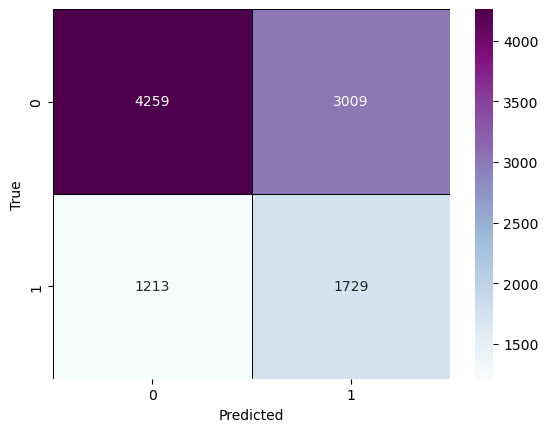

              precision    recall  f1-score   support

           0       0.78      0.59      0.67      7268
           1       0.36      0.59      0.45      2942

    accuracy                           0.59     10210
   macro avg       0.57      0.59      0.56     10210
weighted avg       0.66      0.59      0.61     10210



In [58]:
conf = confusion_matrix(y_test, y_pred)
sns.heatmap(conf, annot=True, linewidth=0.7, linecolor='black', fmt='g', cmap="BuPu")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

print(classification_report(y_test, y_pred))

In [59]:
# using imbalanced data
logReg.fit(X_train, y_train)
y_pred = logReg.predict(X_test)
accuracy_score(y_test, y_pred)

0.7104799216454456

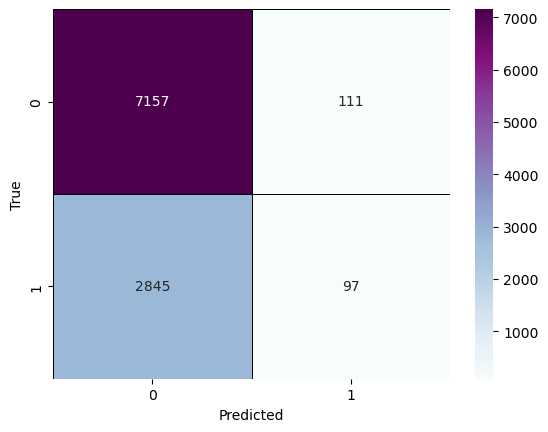

              precision    recall  f1-score   support

           0       0.72      0.98      0.83      7268
           1       0.47      0.03      0.06      2942

    accuracy                           0.71     10210
   macro avg       0.59      0.51      0.45     10210
weighted avg       0.64      0.71      0.61     10210



In [60]:
conf = confusion_matrix(y_test, y_pred)
sns.heatmap(conf, annot=True, linewidth=0.7, linecolor='black', fmt='g', cmap="BuPu")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

print(classification_report(y_test, y_pred))

* <b><i>Decision tree</i></b>

In [87]:
dtc = DecisionTreeClassifier(random_state = 2023)
clf_dtc = dtc.fit(X_train, y_train)
y_pred = clf_dtc.predict(X_test)
precision_score(y_test, y_pred)

0.3619451697127937

In [88]:
clf_dtc.score(X_test, y_test)

0.6289911851126346

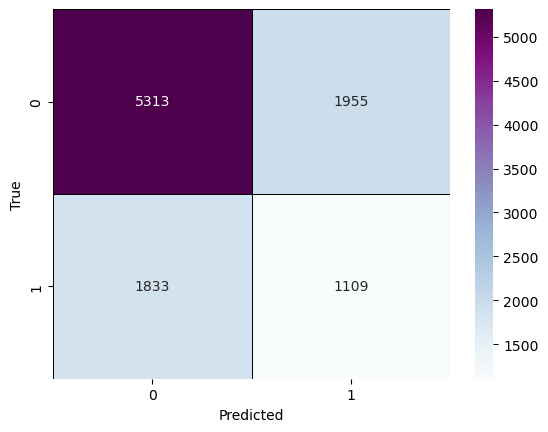

              precision    recall  f1-score   support

           0       0.74      0.73      0.74      7268
           1       0.36      0.38      0.37      2942

    accuracy                           0.63     10210
   macro avg       0.55      0.55      0.55     10210
weighted avg       0.63      0.63      0.63     10210



In [89]:
conf = confusion_matrix(y_test, y_pred)
sns.heatmap(conf, annot=True, linewidth=0.7, linecolor='black', fmt='g', cmap="BuPu")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

print(classification_report(y_test,y_pred))

* <b>Random forest</b>

In [64]:
# Create and fit the Random Forest Classifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Make predictions on the training set
y_pred = rf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7180215475024486


In [65]:
y_1 = rf.predict_proba(X_test)[:, 1]

# Tính AUC bằng hàm roc_auc_score()
auc1 = roc_auc_score(y_test, y_1)

print("AUC: {:.3f}".format(auc1))

AUC: 0.658


In [66]:
rf.score(X_test, y_test)

0.7180215475024486

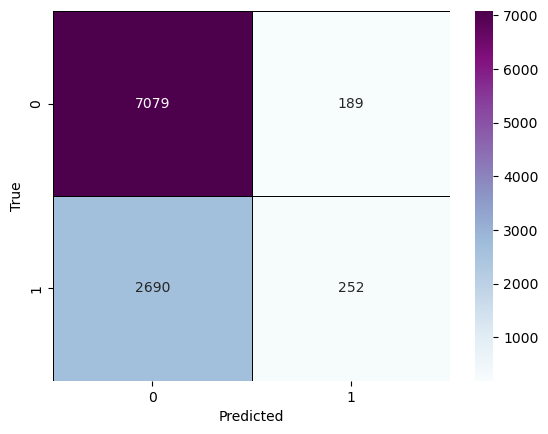

              precision    recall  f1-score   support

           0       0.72      0.97      0.83      7268
           1       0.57      0.09      0.15      2942

    accuracy                           0.72     10210
   macro avg       0.65      0.53      0.49     10210
weighted avg       0.68      0.72      0.63     10210



In [67]:
conf = confusion_matrix(y_test, y_pred)
sns.heatmap(conf, annot=True, linewidth=0.7, linecolor='black', fmt='g', cmap="BuPu")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

print(classification_report(y_test, y_pred))

* <b><i>AdaBoost</i></b>


In [68]:
# using imbalanced data
ada = AdaBoostClassifier()
clf_ada = ada.fit(X_train, y_train)
y_pred = clf_ada.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.96      0.83      7268
           1       0.52      0.10      0.17      2942

    accuracy                           0.71     10210
   macro avg       0.63      0.53      0.50     10210
weighted avg       0.67      0.71      0.64     10210



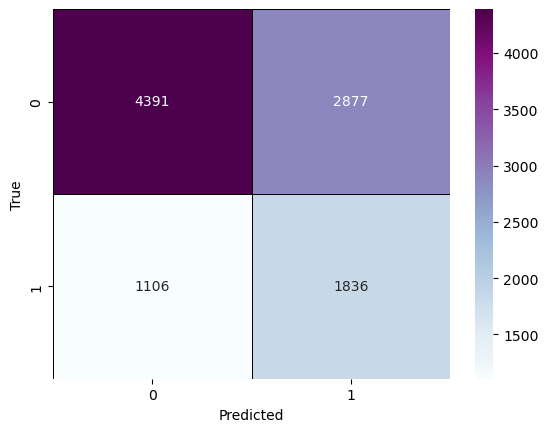

              precision    recall  f1-score   support

           0       0.80      0.60      0.69      7268
           1       0.39      0.62      0.48      2942

    accuracy                           0.61     10210
   macro avg       0.59      0.61      0.58     10210
weighted avg       0.68      0.61      0.63     10210



In [69]:
# using balanced data
clf_ada = ada.fit(X_blnc, y_blnc)
y_pred = clf_ada.predict(X_test)
conf = confusion_matrix(y_test, y_pred)
sns.heatmap(conf, annot=True, linewidth=0.7, linecolor='black', fmt='g', cmap="BuPu")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
print(classification_report(y_test, y_pred))

In [70]:
y_proba = ada.predict_proba(X_test)[:, 1]

# Tính AUC bằng hàm roc_auc_score()
auc = roc_auc_score(y_test, y_proba)

print("AUC: {:.3f}".format(auc))

AUC: 0.663


* <b><i>K Neighbors</i></b>

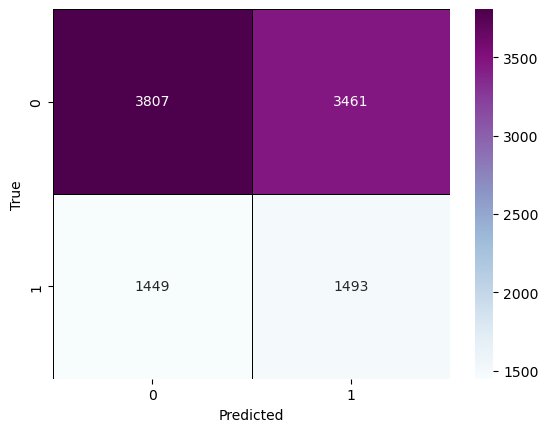

              precision    recall  f1-score   support

           0       0.72      0.52      0.61      7268
           1       0.30      0.51      0.38      2942

    accuracy                           0.52     10210
   macro avg       0.51      0.52      0.49     10210
weighted avg       0.60      0.52      0.54     10210



In [71]:
knn = KNeighborsClassifier(weights = 'distance', n_neighbors = 2)

# using balance data to train
clf_knn = knn.fit(X_blnc, y_blnc)
y_pred = clf_knn.predict(X_test)

conf = confusion_matrix(y_test, y_pred)
sns.heatmap(conf, annot=True, linewidth=0.7, linecolor='black', fmt='g', cmap="BuPu")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
print(classification_report(y_test, y_pred))

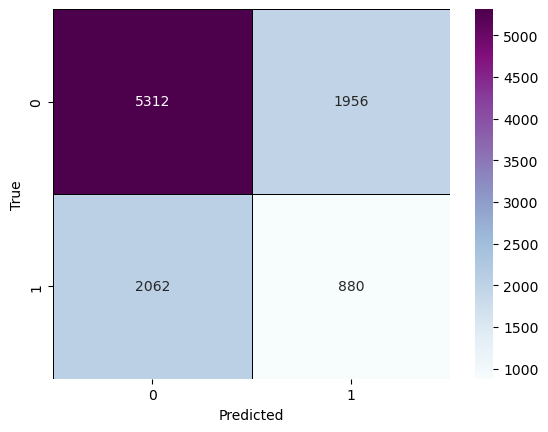

              precision    recall  f1-score   support

           0       0.72      0.73      0.73      7268
           1       0.31      0.30      0.30      2942

    accuracy                           0.61     10210
   macro avg       0.52      0.51      0.52     10210
weighted avg       0.60      0.61      0.60     10210



In [72]:
# using imbalance data to train
clf_knn = knn.fit(X_train, y_train)
y_pred = clf_knn.predict(X_test)

conf = confusion_matrix(y_test, y_pred)
sns.heatmap(conf, annot=True, linewidth=0.7, linecolor='black', fmt='g', cmap="BuPu")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
print(classification_report(y_test, y_pred))

* <b><i>ExtraTreesClassifier</i></b>

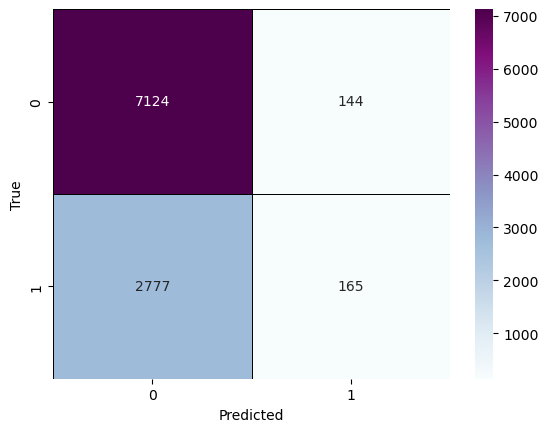

              precision    recall  f1-score   support

           0       0.72      0.98      0.83      7268
           1       0.53      0.06      0.10      2942

    accuracy                           0.71     10210
   macro avg       0.63      0.52      0.47     10210
weighted avg       0.67      0.71      0.62     10210



In [73]:
exTree = ExtraTreesClassifier()

# using imbalance data to train
clf_exTree = exTree.fit(X_train, y_train)
y_pred = clf_exTree.predict(X_test)

conf = confusion_matrix(y_test, y_pred)
sns.heatmap(conf, annot=True, linewidth=0.7, linecolor='black', fmt='g', cmap="BuPu")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
print(classification_report(y_test, y_pred))

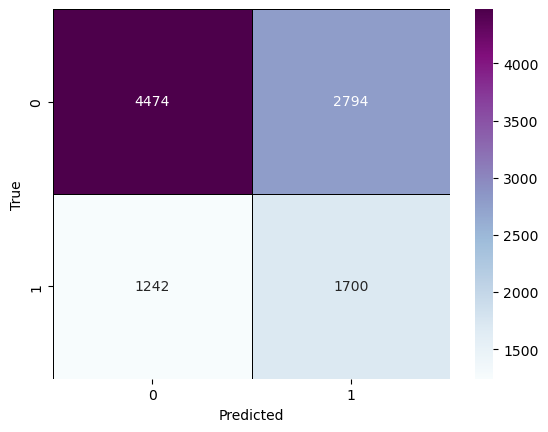

              precision    recall  f1-score   support

           0       0.78      0.62      0.69      7268
           1       0.38      0.58      0.46      2942

    accuracy                           0.60     10210
   macro avg       0.58      0.60      0.57     10210
weighted avg       0.67      0.60      0.62     10210



In [74]:
exTree = ExtraTreesClassifier()

# using balance data to train
clf_exTree = exTree.fit(X_blnc, y_blnc)
y_pred = clf_exTree.predict(X_test)

conf = confusion_matrix(y_test, y_pred)
sns.heatmap(conf, annot=True, linewidth=0.7, linecolor='black', fmt='g', cmap="BuPu")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
print(classification_report(y_test, y_pred))

* <b><i>XGBOOST</i></b>

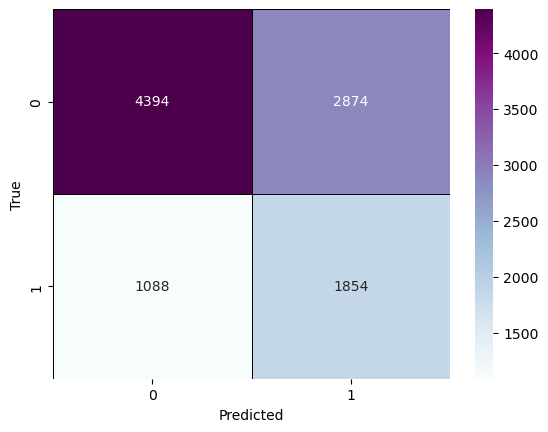

              precision    recall  f1-score   support

           0       0.80      0.60      0.69      7268
           1       0.39      0.63      0.48      2942

    accuracy                           0.61     10210
   macro avg       0.60      0.62      0.59     10210
weighted avg       0.68      0.61      0.63     10210



In [75]:
xgb = XGBClassifier()

clf_xgb = xgb.fit(X_blnc, y_blnc)
y_pred = clf_xgb.predict(X_test)

conf = confusion_matrix(y_test, y_pred)
sns.heatmap(conf, annot=True, linewidth=0.7, linecolor='black', fmt='g', cmap="BuPu")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
print(classification_report(y_test, y_pred))

* <b><i>Gaussian Naive Bayes</i></b>

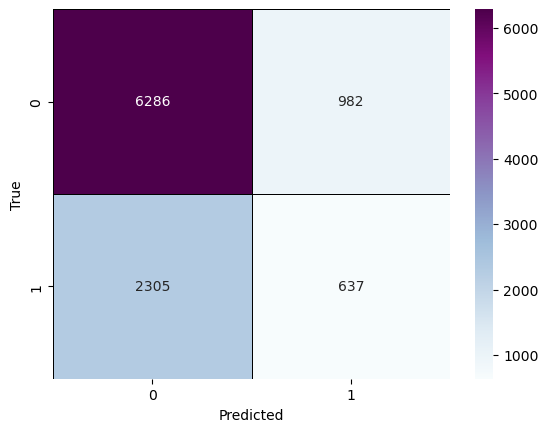

              precision    recall  f1-score   support

           0       0.73      0.86      0.79      7268
           1       0.39      0.22      0.28      2942

    accuracy                           0.68     10210
   macro avg       0.56      0.54      0.54     10210
weighted avg       0.63      0.68      0.64     10210



In [76]:
from sklearn.naive_bayes import GaussianNB

gauss = GaussianNB()
clf_gauss = gauss.fit(X_train, y_train)
y_pred = clf_gauss.predict(X_test)
conf = confusion_matrix(y_test, y_pred)
sns.heatmap(conf, annot=True, linewidth=0.7, linecolor='black', fmt='g', cmap="BuPu")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
print(classification_report(y_test, y_pred))

In [77]:
scale_pos_weight = len(non_churn)/len(churn)
scale_pos_weight

2.4699884440214803

* <b><i>LightGBM</i></b>

              precision    recall  f1-score   support

           0       0.81      0.61      0.69      7268
           1       0.40      0.65      0.50      2942

    accuracy                           0.62     10210
   macro avg       0.61      0.63      0.60     10210
weighted avg       0.69      0.62      0.64     10210



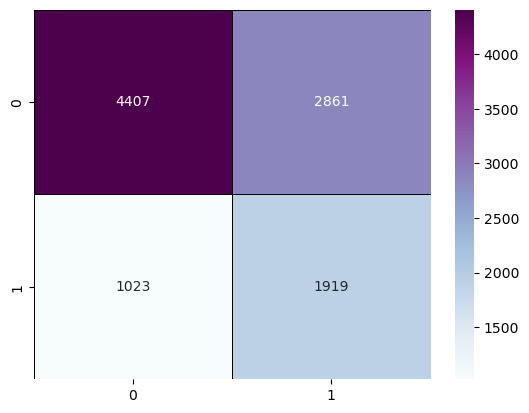

In [78]:
import lightgbm as lgb
lgbm=lgb.LGBMClassifier(scale_pos_weight=scale_pos_weight,learning_rate=0.3,n_estimators=70,
                   num_leaves=7,min_child_weight=0.001,min_child_samples=20)

clf_lgbm=lgbm.fit(X_train, y_train)
y_pred= clf_lgbm.predict(X_test)
conf = confusion_matrix(y_test, y_pred)
sns.heatmap(conf, annot=True, linewidth=0.7, linecolor='black', fmt='g', cmap="BuPu")
print(classification_report(y_test, y_pred))

In [79]:
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold 

from sklearn.metrics import precision_recall_curve
from matplotlib import pyplot

In [80]:
# #Algorithm trials on training and test data

# def run_exps(X_train , y_train, X_test, y_test):

#   models = [
#           ('LogReg', LogisticRegression()), 
#           ('RF', RandomForestClassifier()),
#           ('KNN', KNeighborsClassifier()),
#           ('GaussianNB', GaussianNB()),
#           ('XGB', XGBClassifier()),
#           ('AdaBoost',AdaBoostClassifier()),
#           ('GradiendtBoost',GradientBoostingClassifier()),
#            ('LightGB',lgb.LGBMClassifier())
#         ]

#   for name, model in models:

#     clf = model.fit(X_train,y_train)
#     y_pred = clf.predict(X_test)
#     conf = confusion_matrix(y_test, y_pred)
#     print(name)
#     sns.heatmap(conf, annot=True, linewidth=0.7, linecolor='black', fmt='g', cmap="BuPu")
#     plt.xlabel('Predicted')
#     plt.ylabel('True')
#     plt.show() 
    

#     print(classification_report(y_test, y_pred))
# run_exps(X_train , y_train, X_test, y_test)

### Cross Validation (K - fold)

In [81]:
from sklearn.model_selection import cross_val_score
logReg1 = LogisticRegression(solver = 'liblinear', max_iter = 1000)
clf = DecisionTreeClassifier(random_state = 2023)

lr_scores = cross_val_score(clf, X, y, scoring = "recall", cv = 5)

In [82]:
lr_scores

array([0.38566089, 0.36981645, 0.43235894, 0.38885112, 0.25730795])

### Baseline Model Comparison

In [83]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier 

from xgboost import XGBClassifier

seed = 2023
models = [
    KNeighborsClassifier(weights = 'distance', n_neighbors = 2),
    LogisticRegression(solver = 'liblinear', max_iter = 1000),
    DecisionTreeClassifier(random_state = seed),
    RandomForestClassifier(random_state = seed),
    ExtraTreesClassifier(),
    AdaBoostClassifier(),
    XGBClassifier(eval_metric = 'logloss', random_state = seed),
    lgb.LGBMClassifier(scale_pos_weight=scale_pos_weight,learning_rate=0.3,n_estimators=70,
                   num_leaves=7,min_child_weight=0.001,min_child_samples=20)
]

In [84]:
from sklearn.model_selection import StratifiedKFold
def generate_baseline_results(models, X, y, metrics, cv = 5, plot_result = False):
    
    #define K-fold
    kfold = StratifiedKFold(cv, shuffle = True, random_state = seed)
    entries = []
    for model in models:
        model_name = model.__class__.__name__
#         print(model_name)
        scores = cross_val_score(model, X, y, scoring = metrics, cv = kfold)
        for fold_idx, score in enumerate(scores):
            entries.append((model_name,fold_idx, score))
    cv_df = pd.DataFrame(entries, columns = ['model_name', 'fold_id', "accuracy_score"])
    return cv_df

# generate_baseline_results(models, X, y, metrics = "precision", cv = 5, plot_result = False)
generate_baseline_results(models, X, y, metrics = "accuracy", cv = 5, plot_result = False)


,model_name,fold_id,accuracy_score
0,KNeighborsClassifier,0,0.617532
1,KNeighborsClassifier,1,0.623469
2,KNeighborsClassifier,2,0.617690
3,KNeighborsClassifier,3,0.611813
4,KNeighborsClassifier,4,0.615731
5,LogisticRegression,0,0.710480
6,LogisticRegression,1,0.710941
7,LogisticRegression,2,0.709668
8,LogisticRegression,3,0.712117
9,LogisticRegression,4,0.712802


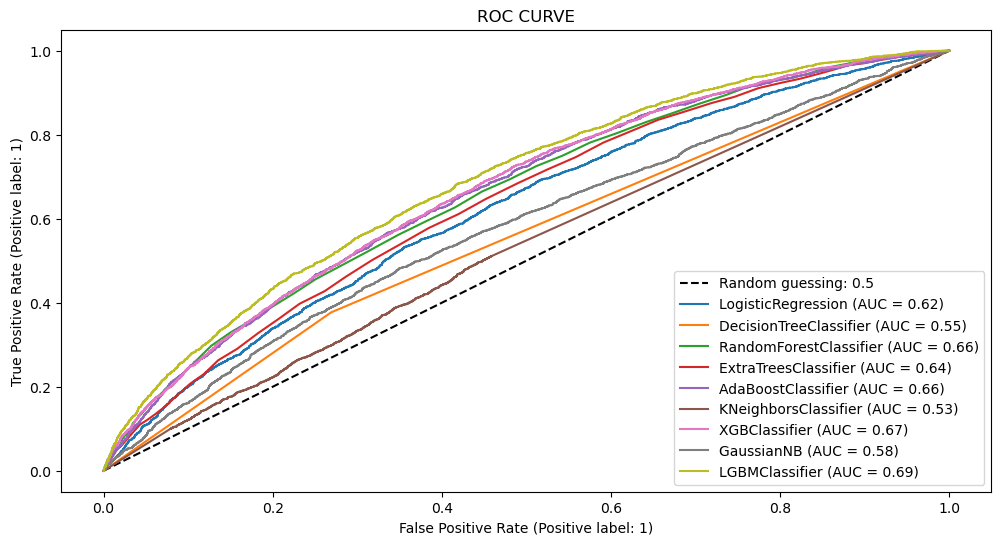

In [92]:
from sklearn.metrics import RocCurveDisplay


models = [logReg, dtc, rf, exTree, ada, knn, xgb, gauss, lgbm]


plt.figure(figsize = (12,6), linewidth= 1)
plt.plot([0,1], [0,1], 'k--', label = 'Random guessing: 0.5')
plt.title("ROC CURVE")
plt.legend(loc="lower right")
ax = plt.gca()
for i in models:
    RocCurveDisplay.from_estimator(i, X_test, y_test,ax=ax)

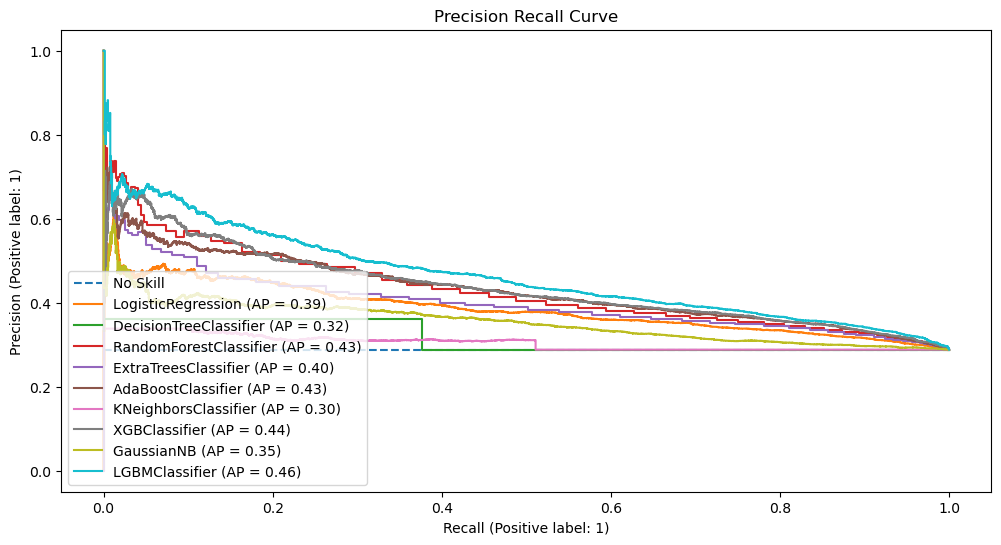

In [93]:
from sklearn.metrics import PrecisionRecallDisplay, precision_recall_curve


models = [logReg, dtc, rf, exTree, ada, knn, xgb, gauss, lgbm]


plt.figure(figsize = (12,6), linewidth= 1)
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.title("Precision Recall Curve")
plt.legend(loc="upper left")
ax = plt.gca()

for i in models:
    PrecisionRecallDisplay.from_estimator(i, X_test, y_test,ax=ax)